In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn



In [35]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df1 = pd.read_csv('train_data.txt', sep=' ::: ', index_col=0, header=None, engine='python', names=['id', 'genre', 'plot'])
df2 = pd.read_csv('test_data.txt', sep=' ::: ', index_col=0, header=None, engine='python', names=['id', 'plot'])
df3 = pd.read_csv('test_data_solution.txt', sep=' ::: ', index_col=0, header=None, engine='python', names=['id', 'genre', 'plot'])

#removes all the punctuations and non words
def clean_text(text):
  text = text.lower()
  text = re.sub(r'\W', ' ', text)
  text = re.sub(r'\s+', ' ', text)
  return text

df1['plot'] = df1['plot'].apply(clean_text)
df2['plot'] = df2['plot'].apply(clean_text)
df3['plot'] = df3['plot'].apply(clean_text)

#vectorizes the data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1, 2))
x_train = vectorizer.fit_transform(df1['plot'])
x_test = vectorizer.transform(df2['plot'])

#using data from the text files for training and testing instead of splitting
y_train = df1['genre']
y_test = df3['genre']

#Using SVM as a model and had to balance the classes due to high imbalance in data
model = LinearSVC(class_weight='balanced', max_iter=2000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Accuracy
 0.47666051660516606

Classification report

               precision    recall  f1-score   support

      action       0.27      0.41      0.33      1314
       adult       0.30      0.54      0.38       590
   adventure       0.17      0.28      0.21       775
   animation       0.13      0.23      0.17       498
   biography       0.03      0.08      0.05       264
      comedy       0.59      0.44      0.50      7446
       crime       0.11      0.25      0.15       505
 documentary       0.77      0.67      0.71     13096
       drama       0.68      0.43      0.53     13612
      family       0.12      0.25      0.17       783
     fantasy       0.09      0.20      0.12       322
   game-show       0.54      0.67      0.60       193
     history       0.05      0.10      0.07       243
      horror       0.49      0.62      0.55      2204
       music       0.39      0.62      0.48       731
     musical       0.09      0.21      0.13       276
     mystery       0.07   

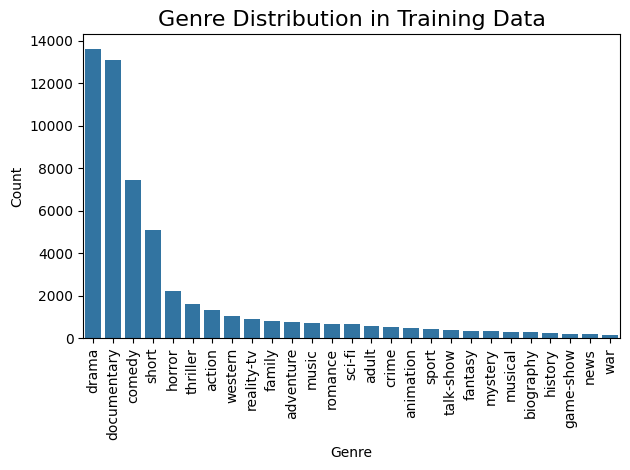

In [44]:
print('Accuracy\n', accuracy_score(y_test, y_pred))
print('\nClassification report\n\n',classification_report(y_test, y_pred))

#To see the major imbalance in the dataset
sns.countplot(data=df1, x='genre', order=df1['genre'].value_counts().index,)
plt.title('Genre Distribution in Training Data', fontsize=16)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Conclusion
#Better results can be achieved using word embeddings like glove and a more balanced dataset across genress


In [ ]:
#